In [ ]:
import os
import numpy as np
import cv2                 
from random import shuffle
from tqdm import tqdm  
import tensorflow as tf 
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from collections import Counter

In [ ]:
image_size = 224 

In [ ]:
pretrained_densenet = tf.keras.applications.DenseNet201(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

for layer in pretrained_densenet.layers:
  layer.trainable = False

x1 = pretrained_densenet.output
x1 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x1)
x1 = tf.keras.layers.Flatten(name="flatten_head")(x1)
x1 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x1)
x1 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x1)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x1)
model_densenet = Model(inputs=pretrained_densenet.input, outputs=model_out)
#model_densenet.summary()

74842112/74836368 [==============================] - 2s 0us/step


In [ ]:
#plot_model(model_densenet, show_shapes=True, to_file='model_densenet.png')

In [ ]:
pretrained_efnet = tf.keras.applications.EfficientNetB7(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

for layer in pretrained_efnet.layers:
  layer.trainable = False

x2 = pretrained_efnet.output
x2 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x2)
x2 = tf.keras.layers.Flatten(name="flatten_head")(x2)
x2 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x2)
x2 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x2)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x2)

model_efnet = Model(inputs=pretrained_efnet.input, outputs=model_out)
#model_efnet.summary()

258080768/258076736 [==============================] - 6s 0us/step


In [ ]:
#plot_model(model_efnet, show_shapes=True, to_file='model_efnet.png')

In [ ]:
pretrained_vgg = tf.keras.applications.VGG16(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

for layer in pretrained_vgg.layers:
  layer.trainable = False

x3 = pretrained_vgg.output
x3 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x3)
x3 = tf.keras.layers.Flatten(name="flatten_head")(x3)
x3 = tf.keras.layers.Dense(128, activation="relu", name="dense_head")(x3)
x3 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x3)
x3 = tf.keras.layers.Dense(64, activation="relu", name="dense_head_2")(x3)
x3 = tf.keras.layers.Dropout(0.5, name="dropout_head_2")(x3)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x3)

model_vgg = Model(inputs=pretrained_vgg.input, outputs=model_out)
#model_vgg.summary()

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
#plot_model(model_vgg, show_shapes=True, to_file='model_vgg.png')

In [ ]:
# model_densenet
# model_efnet
# model_vgg

for layer in model_densenet.layers:
  layer.trainable = False

for layer in model_efnet.layers:
  layer.trainable = False

for layer in model_vgg.layers:
  layer.trainable = False

visible = tf.keras.layers.Input(shape=(image_size, image_size, 3), name="WAZIR_input")
x1 = model_densenet(visible)
x2 = model_efnet(visible)
x3 = model_vgg(visible)
merge = tf.keras.layers.concatenate([x1, x2, x3], name="WAZIR_COMBINEconcatallprobs")
model_out = tf.keras.layers.Dense(3, activation='softmax', name="WAZIR_DENSE_SOFTMAX_LAYERpredictions")(merge)

model_densenet_efnet_vgg = Model(inputs=visible, outputs=model_out)
model_densenet_efnet_vgg.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
WAZIR_input (InputLayer)        [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 3)            19428163    WAZIR_input[0][0]                
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 3)            65572506    WAZIR_input[0][0]                
__________________________________________________________________________________________________
functional_5 (Functional)       (None, 3)            15313091    WAZIR_input[0][0]                
_______________________________________________________________________________________

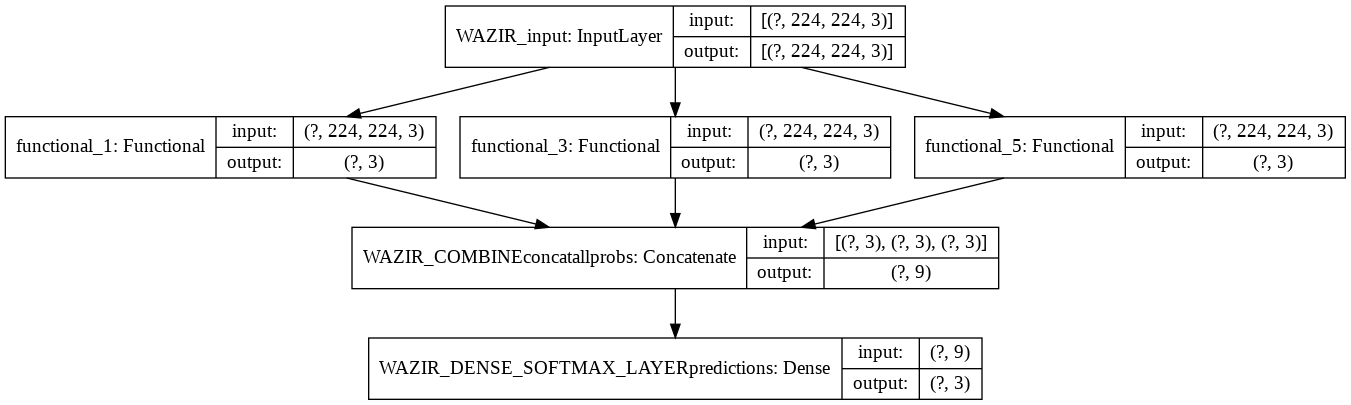

In [ ]:
plot_model(model_densenet_efnet_vgg, show_shapes=True, to_file='model_densenet_efnet_vgg.png')